In [16]:
import pickle
import numpy as np
import os, sys
import matplotlib.pyplot as plt
sys.path.append('../classification')
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from numpy import mean
import math

In [2]:
all_files = os.listdir('../classification')
estimator_files = [file for file in all_files if file.endswith('estimators.p')]

#print(all_files)
print(estimator_files)
base_path = '../classification/'

#with open(base_path + estimator_files[0], 'rb') as f:
#    estimators = pickle.load(f)

['bagidis_1_estimators.p', 'sym2_1_estimators.p', 'db2_1_estimators.p']


In [10]:
#y_probas = bagidis_estimator1.best_estimator_.steps[1][1].oob_decision_function_
#y_pred = np.around(y_probas[:,1])

#fpr, tpr, thresholds = roc_curve(y, y_probas[:,1])
#accuracy = accuracy_score(y, y_pred)
#f1 = f1_score(y, y_pred)
#auc_val = roc_auc_score(y, y_probas[:,1])

#print(accuracy)
#print(f1)
#print(auc_val)

bagidis_1_estimators.p
Max AUC:  0.82093317366 -- Accuracy:  0.750163398693 -- F-Score:  0.768932604694 -- AUC:  0.819104095288
Num Components 67.2 7.95989949685 [64, 82, 58, 66, 66]
sym2_1_estimators.p
Max AUC:  0.938491466807 -- Accuracy:  0.87385620915 -- F-Score:  0.884450143601 -- AUC:  0.935747043724
Num Components 73.6 13.9942845476 [64, 64, 100, 64, 76]
db2_1_estimators.p
Max AUC:  0.937593306626 -- Accuracy:  0.869934640523 -- F-Score:  0.880913200626 -- AUC:  0.936607344238
Num Components 64.8 3.91918358845 [64, 64, 64, 72, 60]


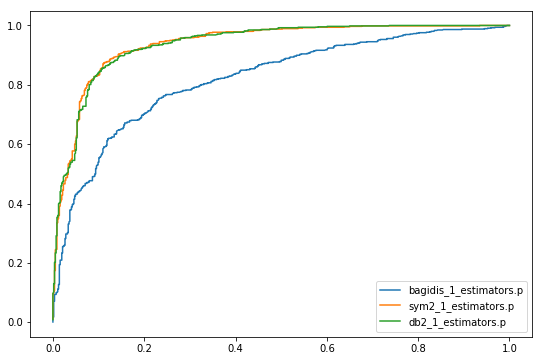

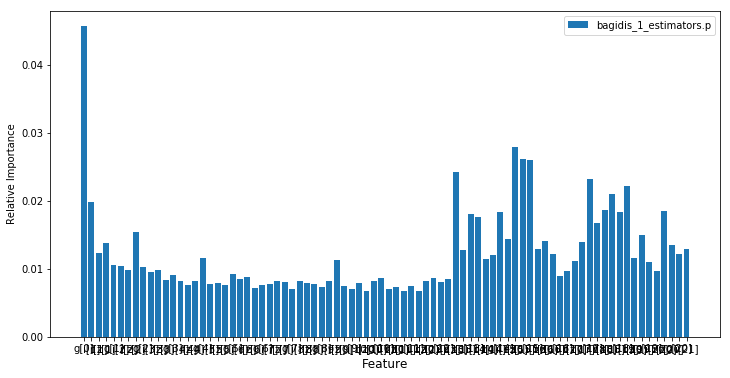

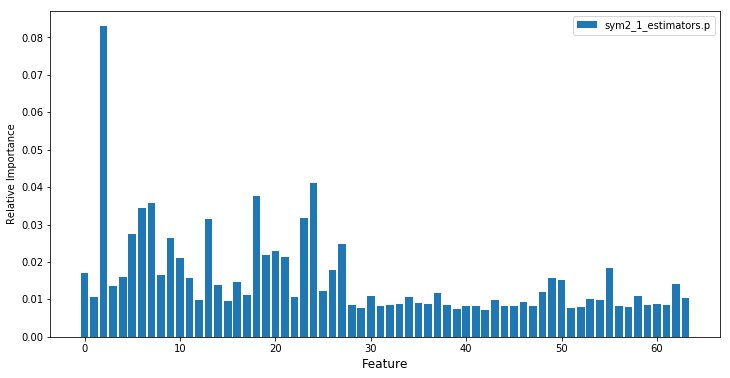

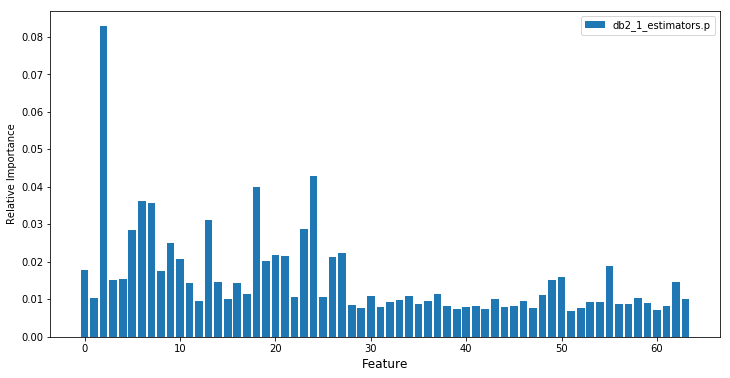

In [30]:
fig1 = plt.figure(figsize=(9,6))
ax1 = fig1.add_subplot(111)

for dump_file in estimator_files:
    fig2 = plt.figure(figsize=(12,6))
    ax2 = fig2.add_subplot(111)
    print(dump_file)
    with open(base_path+dump_file, 'rb') as f:
        dump_data = pickle.load(f)
    estimators = dump_data[0]
    y = dump_data[1][1]
    feature_importances = np.zeros((len(estimators), len(estimators[0].best_estimator_.steps[1][1].feature_importances_)))

    accuracies = []
    f1_scores = []
    auc_vals = []
    max_auc_val = 0
    num_thresholds = len(roc_curve(y, estimators[0].best_estimator_.steps[1][1].oob_decision_function_[:,1])[0])
    num_estimators = len(estimators)
    num_components = []

    for i, estimator in enumerate(estimators):
        num_components.append(len(estimator.best_estimator_.steps[1][1].feature_importances_))
        #print("Number of Components: ", len(estimator.best_estimator_.steps[1][1].feature_importances_))
        #feature_importances[i,:] = estimator.best_estimator_.steps[1][1].feature_importances_
        #print(estimator.best_estimator_.steps)
        y_probas = estimator.best_estimator_.steps[1][1].oob_decision_function_
        y_pred = np.around(y_probas[:,1])

        accuracies.append(accuracy_score(y, y_pred))
        f1_scores.append(f1_score(y, y_pred))
        auc_vals.append(roc_auc_score(y, y_probas[:,1]))


        if auc_vals[-1] > max_auc_val:
            num_comp_feature_importances = len(estimator.best_estimator_.steps[1][1].feature_importances_)
            feature_importances = estimator.best_estimator_.steps[1][1].feature_importances_
            max_auc_val = auc_vals[-1]
            fpr, tpr, thresholds = roc_curve(y, y_probas[:,1])

    avg_accuracy = mean(accuracies)
    avg_f1 = mean(f1_scores)
    avg_auc_val = mean(auc_vals)

    print("Max AUC: ", max_auc_val, "-- Accuracy: ", avg_accuracy, "-- F-Score: ", avg_f1, "-- AUC: ", avg_auc_val)
    print("Num Components", mean(num_components), np.std(num_components), num_components)
    #print("Accuracy: ", avg_accuracy)
    #print("F-Score: ", avg_f1)
    #print("AUC: ", avg_auc_val)
    label = dump_file
    ax1.plot(fpr, tpr, label=label)
    filt_order = ['g', 'i','r','z']
    components = []
    for i in range(num_comp_feature_importances):
        #print(i)
        filt = filt_order[i%len(filt_order)]
        #print(filt)
        coeff_idx = str(math.ceil(i/len(filt_order)))
        components.append(filt+'['+coeff_idx+']')
    #components = [filt_order[i%len(filt_order)]+'['+str(math.ceil(i))+']' for i in range(num_comp_feature_importances)]
    #print(components)
    ind = range(len(components))
    ax2.bar(ind, feature_importances, label=dump_file)
    if dump_file.startswith('bagidis'):
        ax2.set_xticklabels(components)
        ax2.set_xticks(ind)
    ax2.set_xlabel('Feature',{'fontsize': 'large'})
    ax2.set_ylabel('Relative Importance')
    ax2.legend()
    fig2_name = dump_file
    #plt.show()
    #fig2.savefig(dump_file + '.pdf')
ax1.legend() 
plt.show()
    